# Proyek Analisis Data: Air Quality in Guanyuan

- Nama: Farhan Rasyad Koswara
- Email: frk3296@gmail.com
- Id Dicoding: Farhan Rasyad Koswara

## Menentukan Pertanyaan Bisnis

- Diantara Maret 2013 - Februari 2017, pada tahun berapa temperatur di Guanyuan berada di puncak atau suhu terpanas?
- Bagaimana keadaan demografi curah hujan di Guanyuan pada Maret 2013 - Februari 2017?

## Menyiapkan semua library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns






## Data Wrangling



Langkah pertama yang dilakukan dalam melakukan data analisis.
dimulai dengan mengumpulkan data yang dibutuhkan untuk menjawab pertanyaan analisis yang telah dibuat sebelumnya. Kemudian menilai kualitas dan struktur dari data dibutuhkan, dan akhirnya dilakukan cleaning data.

### Gathering Data

In [ ]:
import io


from google.colab import files


uploaded = files.upload()
#file yang di upload adalah file "Air_quality-guanyuan_2013-2017.csv"

Saving Air_quality-guanyuan_2013-2017.csv to Air_quality-guanyuan_2013-2017.csv


In [ ]:
import pandas as pd

df = pd.read_csv("Air_quality-guanyuan_2013-2017.csv", delimiter=",")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,16749,2015,1,27,20,30.0,48.0,17.0,81.0,1100.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Guanyuan
1,17264,2015,2,18,7,10.0,10.0,7.0,24.0,500.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,Guanyuan
2,31048,2016,9,14,15,70.0,70.0,7.0,22.0,800.0,193.0,NaN,NaN,NaN,NaN,SW,3.1,Guanyuan
3,31316,2016,9,25,19,180.0,216.0,3.0,93.0,1800.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,Guanyuan
4,31317,2016,9,25,20,186.0,222.0,3.0,72.0,1800.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Guanyuan


### Assessing Data

In [ ]:
import pandas as pd

df = pd.read_csv("Air_quality-guanyuan_2013-2017.csv", delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
import pandas as pd

df = pd.read_csv("Air_quality-guanyuan_2013-2017.csv", delimiter=",")
#melakukan check data yang hilang atau Nan
df.isnull().sum()



No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [ ]:
import pandas as pd

df = pd.read_csv("Air_quality-guanyuan_2013-2017.csv", delimiter=",")

#melakukan check data yang terdapat duplikat
df.duplicated().sum()

0

In [ ]:
import pandas as pd

df = pd.read_csv("Air_quality-guanyuan_2013-2017.csv", delimiter=",")
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


### Cleaning Data

In [ ]:
import pandas as pd

df = pd.read_csv("Air_quality-guanyuan_2013-2017.csv", delimiter=",")
#cleaning dengan metode dropping, karena dateset yang digunakan lebih dari 10.000 unit atau sangat besar.
df.dropna(axis=0, inplace=True)

df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
20,3928,2013,8,11,15,211.0,157.0,3.0,24.0,1100.0,194.0,23.5,1000.4,23.0,72.5,NNE,3.9,Guanyuan
21,30964,2016,9,11,3,56.0,56.0,4.0,59.0,1000.0,45.0,19.7,1008.3,18.9,46.4,E,3.4,Guanyuan
23,21357,2015,8,7,20,34.0,47.0,2.0,30.0,700.0,136.0,19.7,1010.5,18.7,36.6,ENE,1.4,Guanyuan
24,20333,2015,6,26,4,108.0,108.0,2.0,15.0,900.0,120.0,20.3,995.8,19.5,33.7,E,1.8,Guanyuan
25,21094,2015,7,27,21,39.0,39.0,2.0,8.0,800.0,148.0,22.9,1000.1,22.2,33.1,W,2.9,Guanyuan


In [ ]:
import pandas as pd
#drop data duplikat pada dataset
df = pd.read_csv("Air_quality-guanyuan_2013-2017.csv", delimiter=",")
df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

Explorasi data analisis merupakan langkah yang digunakan untuk menjawab pertanyaan dan membantu untuk mengenal data yang sedang ditangani juga membuat strategi analisis yang paling efisien

### Explore ...

In [ ]:
import pandas as pd

df = pd.read_csv("Air_quality-guanyuan_2013-2017.csv", delimiter=",")
#melihat rangkuman parameter statistik dari data df menggunakan method describe()
df.dropna(axis=0, inplace=True)
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263,32263.000000,32263
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4670,NaN,32263
mean,18055.294300,2014.731519,6.411555,15.718780,11.548368,83.101051,108.974559,17.263085,57.698591,1265.709760,55.832982,13.707451,1011.856881,3.242758,0.069377,NaN,1.719462,NaN
std,9974.437594,1.148731,3.426927,8.842654,6.935752,81.448350,91.583482,23.551127,35.113587,1157.718045,57.733303,11.423989,10.436685,13.767873,0.911777,NaN,1.198474,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,9790.500000,2014.000000,3.000000,8.000000,6.000000,23.000000,40.000000,3.000000,30.000000,500.000000,7.000000,3.200000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,18323.000000,2015.000000,6.000000,16.000000,12.000000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.800000,1011.200000,4.100000,0.000000,NaN,1.400000,NaN
75%,26555.000000,2016.000000,9.000000,23.000000,18.000000,115.000000,149.000000,21.000000,78.000000,1600.000000,81.050000,23.400000,1020.300000,15.800000,0.000000,NaN,2.200000,NaN


In [ ]:
import pandas as pd
#demografi curah hujan(mm) di Guanyuan pada tahun 2013 - 2017
df = pd.read_csv("Air_quality-guanyuan_2013-2017.csv", delimiter=",")
df.dropna(axis=0, inplace=True)

df.groupby(by="year").agg({
    "No": "nunique",
    "RAIN": ["max", "min", "mean", "std"]
})

No  RAIN                         
     nunique   max  min      mean       std
year                                       
2013    5751  72.5  0.0  0.090315  1.184577
2014    8213  26.8  0.0  0.049872  0.667929
2015    8560  36.6  0.0  0.073189  0.895653
2016    8425  46.4  0.0  0.080736  0.987120
2017    1314   0.8  0.0  0.001979  0.031160

In [ ]:
import pandas as pd
#demografi temperatur di Guanyuan pada tahun 2013 - 2017
df = pd.read_csv("Air_quality-guanyuan_2013-2017.csv", delimiter=",")
df.dropna(axis=0, inplace=True)
df.groupby(by="year").agg({
    "No": "nunique",
    "TEMP": ["max", "min", "mean", "std"]})

No  TEMP                            
     nunique   max   min       mean        std
year                                          
2013    5751  37.9  -9.4  17.047522   9.721328
2014    8213  40.5 -12.2  13.924997  11.328991
2015    8560  38.8 -10.0  13.421280  11.359608
2016    8425  37.3 -16.8  13.543920  11.895348
2017    1314  15.9  -9.7   0.641936   4.519887

## Visualization & Explanatory Analysis

Langkah visualisasi data atau langkah menyajikan data dengan bentuk visual. Langkah ini digunakan untuk memudahkan dalam menyampaikan cerita dan pesan dari sebuah data

### Pertanyaan 1: Diantara Maret 2013 - Februari 2017, pada tahun berapa temperatur di Guanyuan berada di puncak atau suhu terpanas?

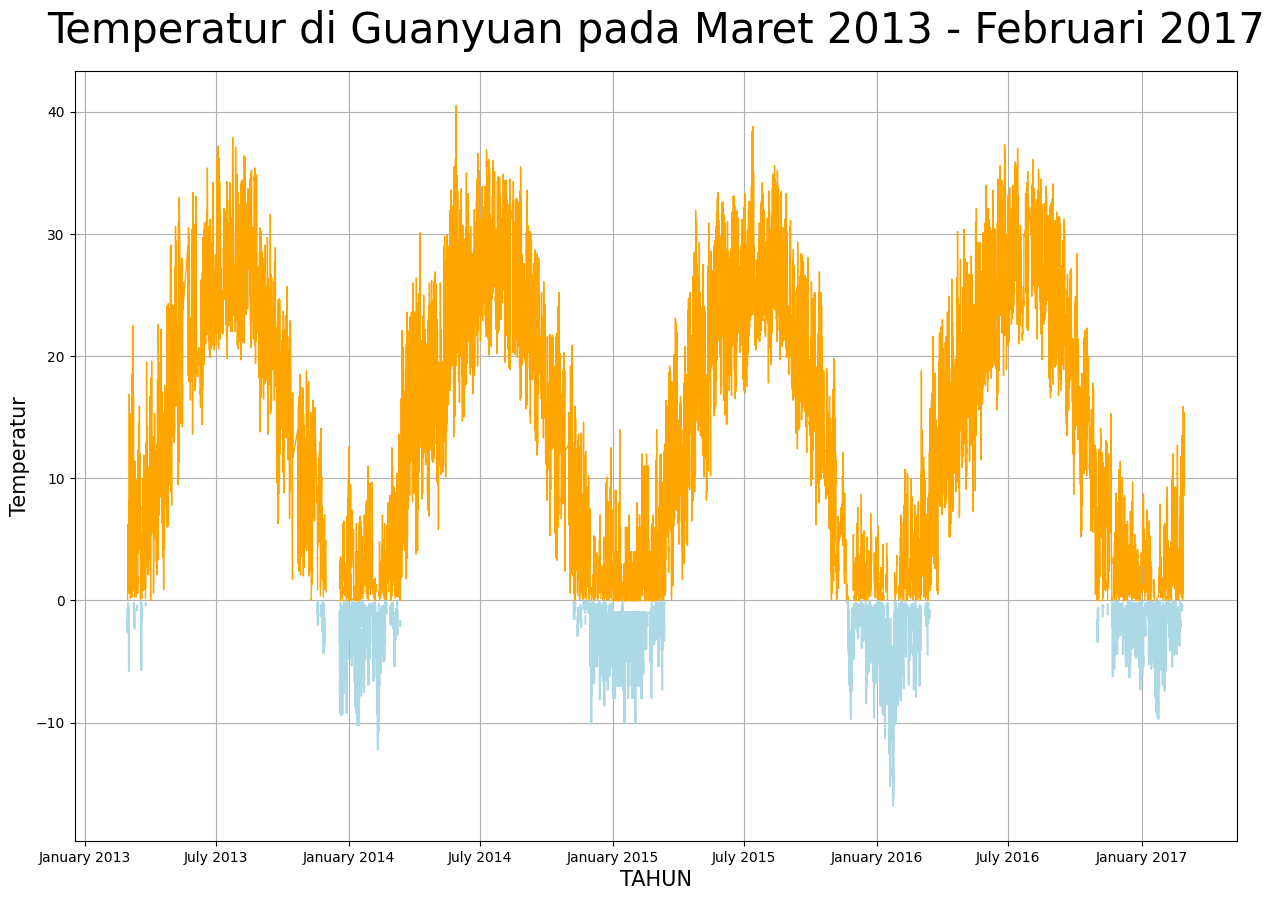

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


#demografi temperatur di Guanyuan pada tahun 2013 - 2017
df = pd.read_csv("Air_quality-guanyuan_2013-2017.csv", delimiter=",")
df.dropna(axis=0, inplace=True)
df.groupby(by="year").agg({
    "No": "nunique",
    "TEMP": ["max","min"]})
#membuat kolom tanggal agar plot menjadi time series
df['tanggal']=pd.to_datetime(df[['year','month','day','hour']])
df1=df.sort_values(['tanggal'])
# Pisahkan data di bawah nol dan di atas nol
df1['Di Bawah Nol'] = df1['TEMP'][df1['TEMP'] < 0]
df1['Di Atas Nol'] = df1['TEMP'][df1['TEMP'] >= 0]
#membuat plot
plt.figure(figsize=(15,10 ))
plt.plot(
    df1['tanggal'],
    df1['Di Atas Nol'],

    linewidth=1,
    linestyle='-',
    color='orange'
)
plt.plot(df1['tanggal'], df1['Di Bawah Nol'], linestyle='-', color='lightblue', label='Di Bawah Nol')
#mengatur format label sumbu x menjadi hanya tahun dan bulan
date_format= mdates.DateFormatter('%B %Y')
plt.gca().xaxis.set_major_formatter(date_format)

#mengatur judul dan label
plt.title("Temperatur di Guanyuan pada Maret 2013 - Februari 2017", loc="center", fontsize=30,pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('TAHUN',fontsize=15)
plt.ylabel('Temperatur',fontsize=15)
plt.grid(True)

plt.show()


### Pertanyaan 2: Bagaimana keadaan demografi curah hujan di Guanyuan pada Maret 2013 - Februari 2017?

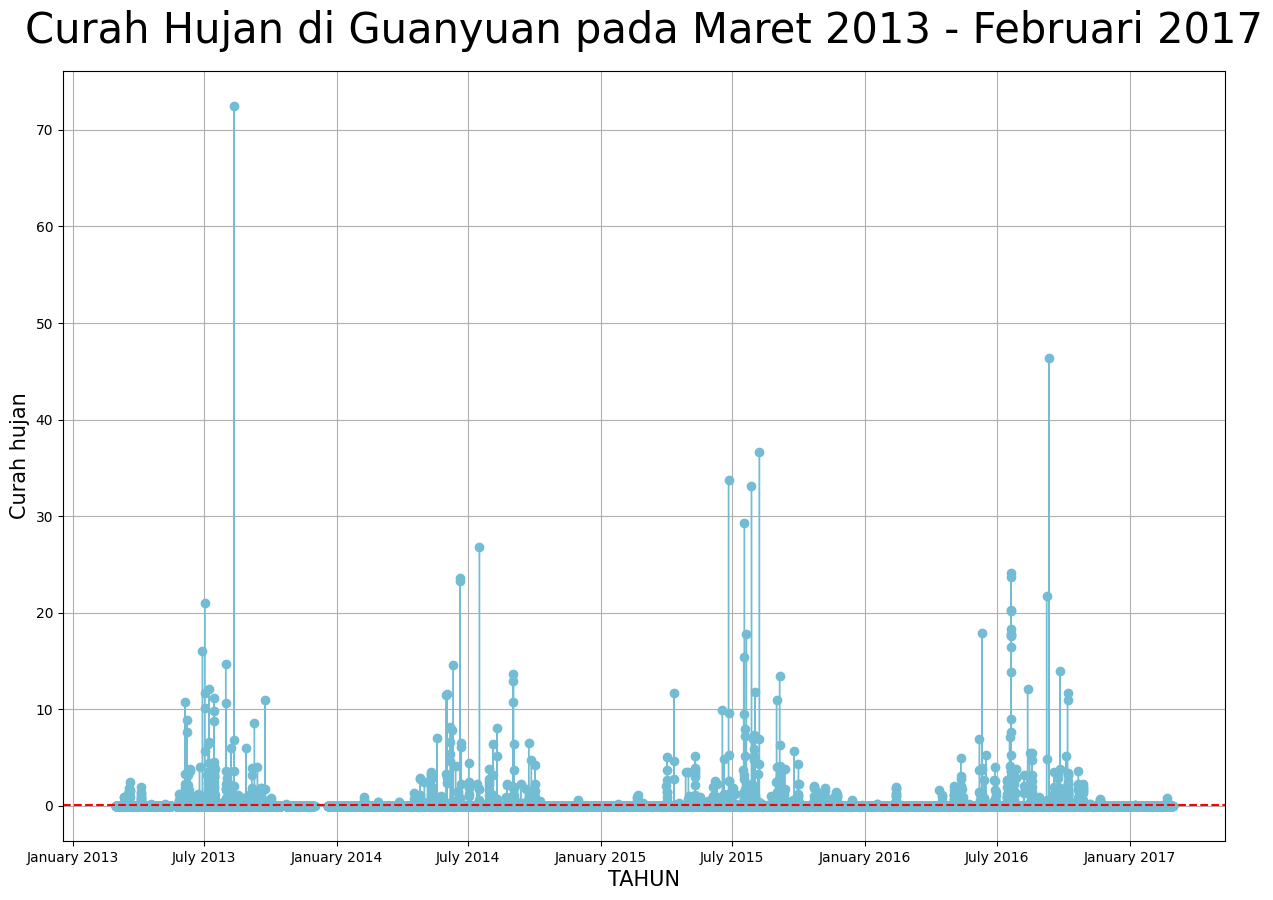

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
#demografi curah hujan di Guanyuan pada tahun 2013-2017
df = pd.read_csv("Air_quality-guanyuan_2013-2017.csv", delimiter=",")
df.dropna(axis=0, inplace=True)
df['tanggal'] = pd.to_datetime(df[['year','month','day','hour']])
df1=df.sort_values(['tanggal'])

#df1.head()
mean_value= df1['RAIN'].mean()
#membuat plot
plt.figure(figsize=(15,10 ))
plt.plot(
    df1['tanggal'],
    df1['RAIN'],
    marker='o',
    linewidth=1,
    linestyle='-',
    color="#72BCD4"
)
#mengatur format label sumbu x menjadi hanya tahun dan bulan
date_format= mdates.DateFormatter('%B %Y')
plt.gca().xaxis.set_major_formatter(date_format)
#tambahkan garis rata - rata
plt.axhline(mean_value, color='red',linestyle='--',label=f'Rata - rata:{mean_value:.2f}')
#mengatur judul dan label
plt.title("Curah Hujan di Guanyuan pada Maret 2013 - Februari 2017", loc="center", fontsize=30,pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('TAHUN',fontsize=15)
plt.ylabel('Curah hujan',fontsize=15)
plt.grid(True)

plt.show()


## Conclusion
Conclusion merupakan kesimpulan akhir dan jawaban dari pertanyaan.

- Berdasarkan hasil dari visualisasi data, diketahui temperatur tertinggi(suhu= 40.5 derajat) terjadi pada tahun 2014.
- Berdasarkan hasil dari visualisasi data, diketahui rata -rata jumlah curah hujan di Guanyuan pada Maret 2013 - Februari 2017 mendekati nilai nol atau sedikit hujan.